## **3. Exploratory Data Analysis (EDA)**

In [37]:
import os
import pandas as pd
from slugify import slugify

artist_name = 'Avenged Sevenfold'
artist_slug = slugify(artist_name)

df = pd.read_csv(f'unduhan/{artist_slug}-with-lyrics.csv', sep=";")
df = df.sort_values('Judul')

df.head()

,Unnamed: 0,Judul,album,Lirik
0,0,(D)eath,Life Is But A Dream…,Watch your tongue or have it cut from your hea...
1,1,(O)rdinary,Life Is But A Dream…,Skull!\n\nThey all know\nThey all know\n\nSorr...
2,2,4:00 AM,Diamonds In The Rough,"Finished with my woman, 'cause she couldn't he..."
3,3,A Little Piece Of Heaven,Avenged Sevenfold,You live your whole life staring at a wall\nYo...
4,4,Acid Rain,Hail To The King,"Open, blurry, nurture, loving\nCrawling, walki..."


Cari tau distribusi penggunaan kata untuk masing-masing albumnya.

In [22]:
import plotly.graph_objs as go
import plotly.offline as py

df['Jumlah Kata'] = df['Lirik'].apply(lambda x: len(x.split()))

fig = go.Figure(data=[go.Bar(
    x=df['album'], 
    y=df['Jumlah Kata']
)])
fig.update_layout(title='Jumlah Kata pada Setiap Album', xaxis_title='Album', yaxis_title='Jumlah Kata')
py.iplot(fig, filename='basic-bar')


In [36]:
all_words = df['Lirik'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the dataset'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

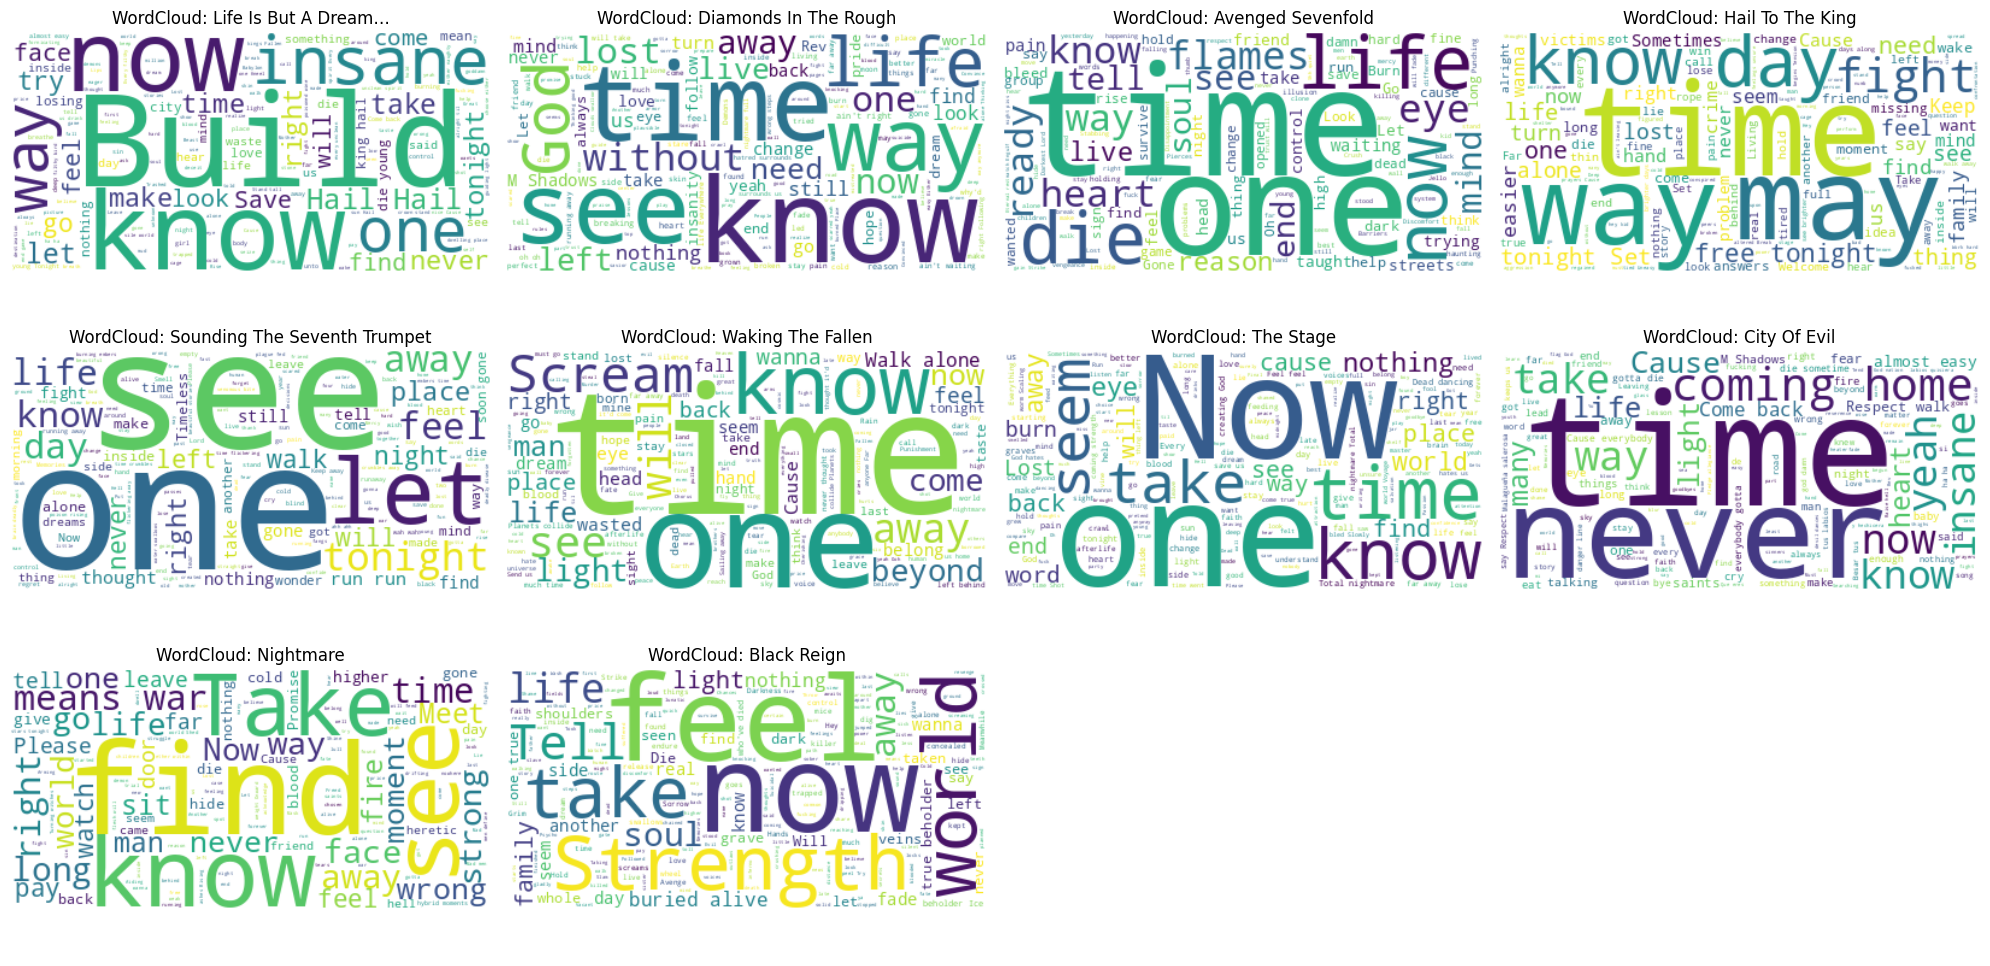

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Menghitung jumlah baris dan kolom
num_rows = 3
num_cols = 4
num_plots = num_rows * num_cols

# Mengatur ukuran grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Membuat WordCloud untuk setiap album
for i, album in enumerate(df['album'].unique()):
    # Menggabungkan kata-kata dalam album
    text = ' '.join(df[df['album'] == album]['Lirik'])
    
    # Membuat WordCloud
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
    
    # Menampilkan WordCloud pada subplot yang sesuai
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'WordCloud: {album}')
    ax.axis('off')

# Menghilangkan subplot yang tidak digunakan
for i in range(len(df['album'].unique()), num_plots):
    axes[i // num_cols, i % num_cols].axis('off')

plt.tight_layout()
plt.show()